In [1]:
from detector_model import NorthernTracksDetectorModel, CascadesDetectorModel
from backend.stan_generator import (
    StanGenerator, GeneratedQuantitiesContext, DataContext,
    FunctionsContext, Include, ForLoopContext, StanFileGenerator)
from backend.operations import FunctionCall
from backend.variable_definitions import ForwardVariableDef, ForwardArrayDef
from backend.parameterizations import LogParameterization
from backend.expression import StringExpression
from backend.parameterizations import DistributionMode
import logging
logging.basicConfig(level=logging.WARN)
import pystan
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats

try:
    import holoviews as hv
    from holoviews import opts
    hv.extension('bokeh', "matplotlib")
except ModuleNotFoundError:
    print("No holoviews")
import seaborn as sns


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

# Create stan files for the detector model

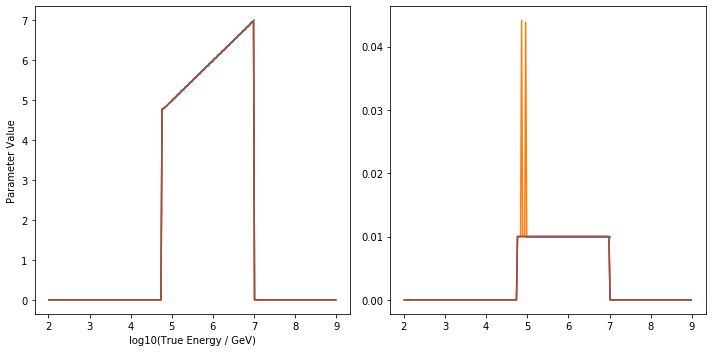

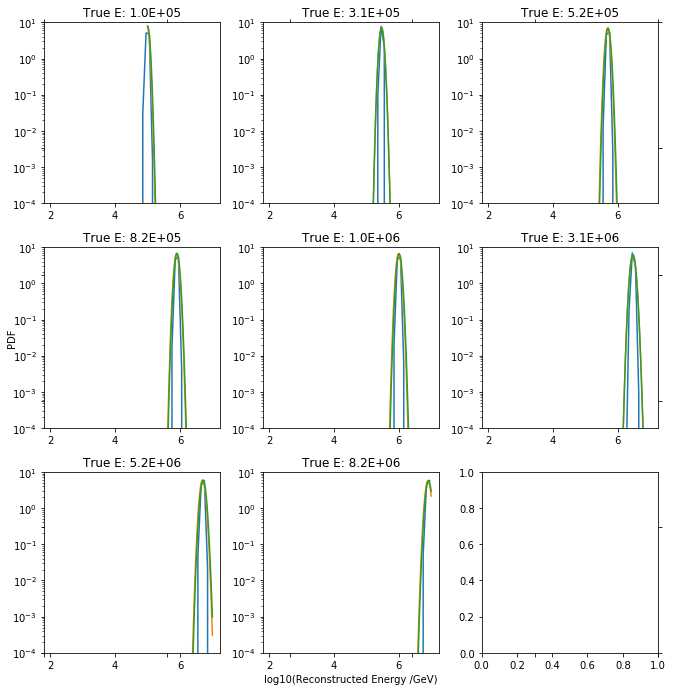

In [2]:
with StanFileGenerator("stan_files/detector_model_test") as cg:   
#     ntd = NorthernTracksDetectorModel()    
    ntd = CascadesDetectorModel()    
    cg.generate_files()
    

# Plot detector model distributions

In [3]:
e_true_name = "e_trues"
e_reco_name = "e_recos"
true_dir_name = "true_dirs"
reco_zenith_name = "reco_zeniths"

with StanGenerator() as cg:

    with FunctionsContext() as fc:
        _ = Include("utils.stan")
        _ = Include("vMF.stan")

    with DataContext() as dc:
        array_length = ForwardVariableDef("n", "int")
        array_length_str = ["[", array_length, "]"]
        
        e_trues = ForwardArrayDef(e_true_name, "real", array_length_str)
        e_recos = ForwardArrayDef(e_reco_name, "real", array_length_str)
        true_dirs = ForwardArrayDef(true_dir_name, "vector[3]", array_length_str)
        reco_zenith = ForwardArrayDef(reco_zenith_name, "real", array_length_str)

    with GeneratedQuantitiesContext() as gq:
#         ntd = NorthernTracksDetectorModel()
        ntd = CascadesDetectorModel()    

        array_length_2d_str = ["[", array_length, ",", array_length, "]"]
        e_res_result = ForwardArrayDef("e_res", "real", array_length_2d_str)
        eff_area_result = ForwardArrayDef("eff_area", "real", array_length_2d_str)
        ang_res_result = ForwardArrayDef("ang_res", "real", array_length_2d_str)

        
        reco_dir_ang_res = ForwardVariableDef("reco_dir", "vector[3]")        
        true_dir_ang_res = ForwardVariableDef("true_dir", "vector[3]")
        true_dir_ang_res << StringExpression("[sin(pi()/2), 0, cos(pi()/2)]'")
        
        with ForLoopContext(1, array_length, "i") as i:
            with ForLoopContext(1, array_length, "j") as j:
                eff_area_result[i][j] << ntd.effective_area(e_trues[i], true_dirs[j])       
                e_res_result[i][j] << ntd.energy_resolution(e_trues[i], e_recos[j])
                reco_dir_ang_res << StringExpression(["[sin(", reco_zenith[j], "), 0, cos(", reco_zenith[j],")]'"])
                ang_res_result[i][j] << ntd.angular_resolution(e_trues[i], true_dir_ang_res, reco_dir_ang_res)
    model = cg.generate()

In [4]:
this_dir = os.path.abspath('')
sm = pystan.StanModel(
    model_code=model,
    include_paths=[os.path.join(this_dir, "../dev/statistical_model/4_tracks_and_cascades/stan/")],
    verbose=False)

In [5]:
n = 100
e_reco = np.logspace(4, 7, n)
e_true = np.logspace(4, 7, n)
reco_zeniths = np.radians(np.linspace(85, 95, n))
reco_zeniths = np.radians(np.linspace(85, 95, n))
zeniths = np.radians(np.linspace(85, 180, n, endpoint=False))
true_dir = np.asarray([np.sin(zeniths), np.zeros_like(zeniths), np.cos(zeniths)]).T

true_dir_name

data = {
    e_true_name: e_reco,
    e_reco_name: e_true,
    true_dir_name: true_dir,
    reco_zenith_name: reco_zeniths,
    "n": n
    #"reco_dir": dir2
}
fit = sm.sampling(data=data, iter=1, chains=1, algorithm="Fixed_param")


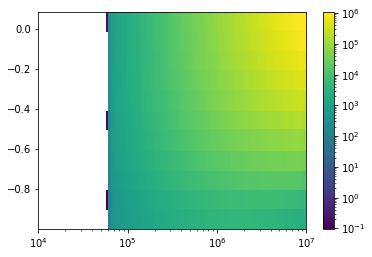

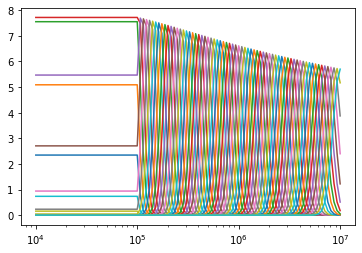

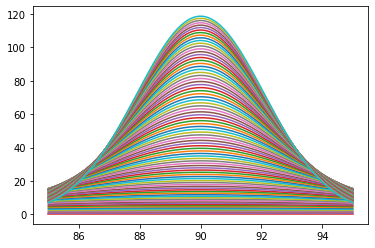

In [6]:
plt.pcolormesh(e_true, np.cos(zeniths), fit.extract()["eff_area"].squeeze().T,
              norm=LogNorm())
plt.colorbar()
plt.semilogx()
plt.figure()
_ =plt.plot(e_reco, np.exp(fit.extract()["e_res"].squeeze()))
plt.semilogx()

plt.figure()
_ =plt.plot(np.degrees(reco_zeniths), np.exp(fit.extract()["ang_res"].squeeze()).T)

:HoloMap   [Energy]
   :Curve   [x]   (y)
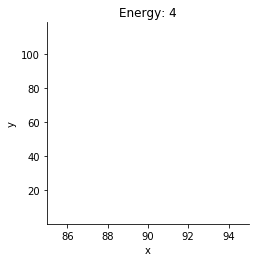
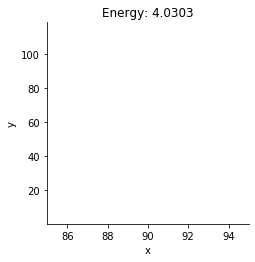
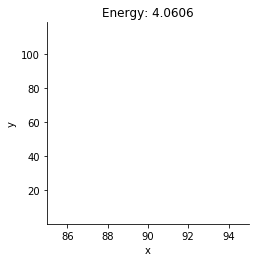
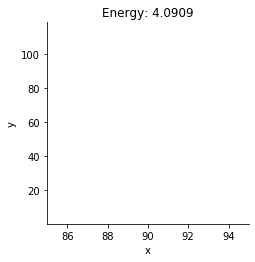
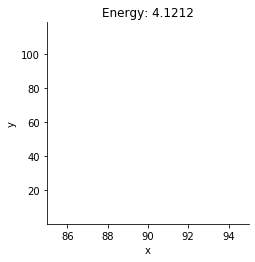
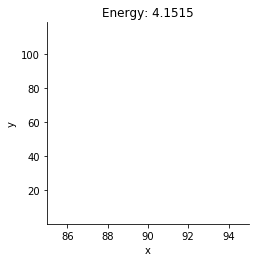
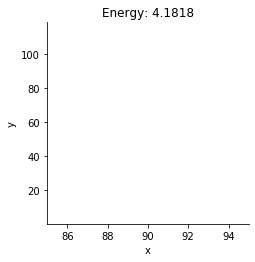
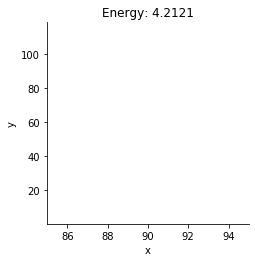
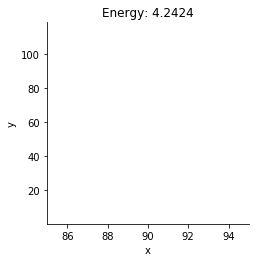
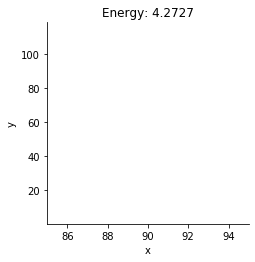
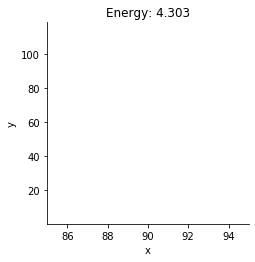
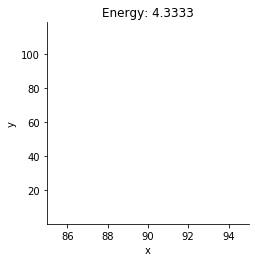
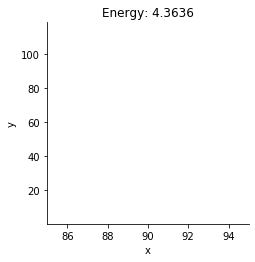
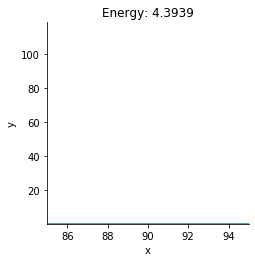
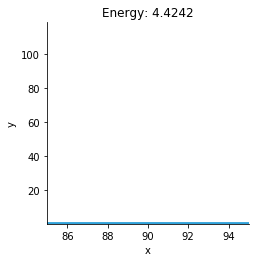
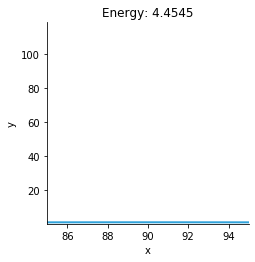
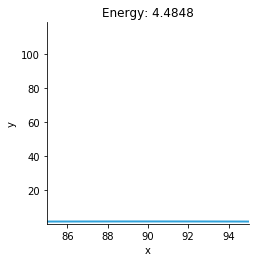
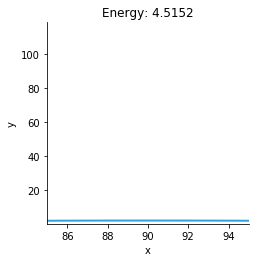
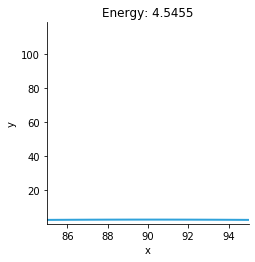
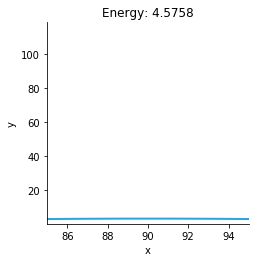
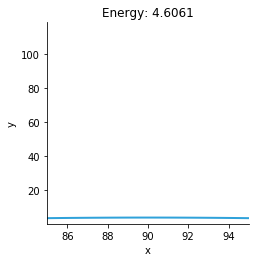
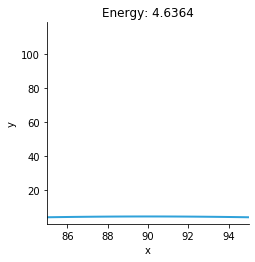
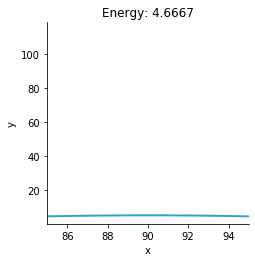
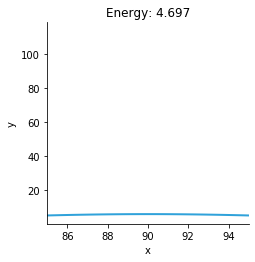
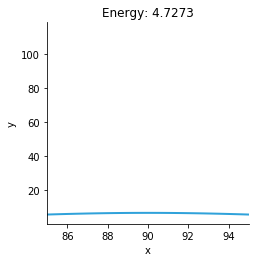
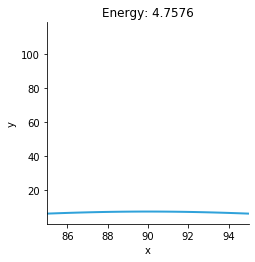
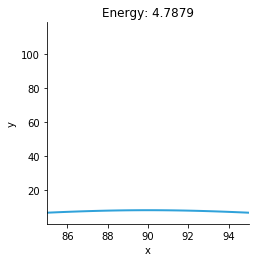
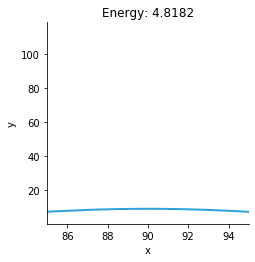
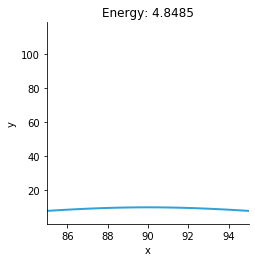
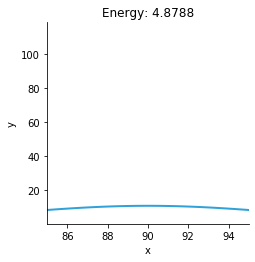
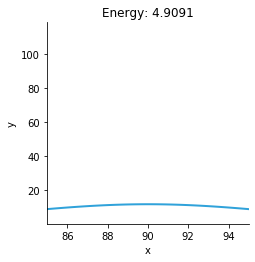
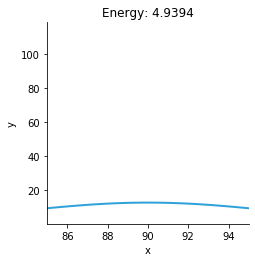
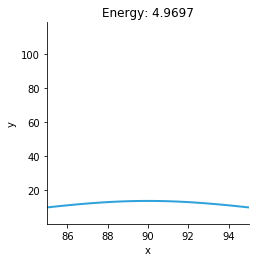
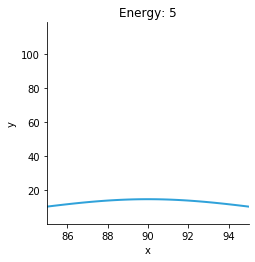
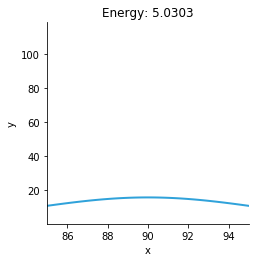
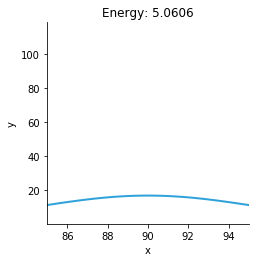
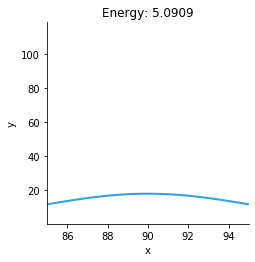
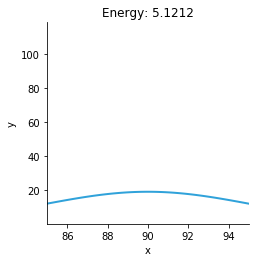
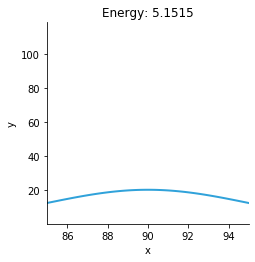
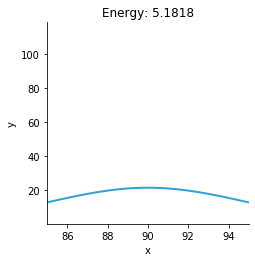
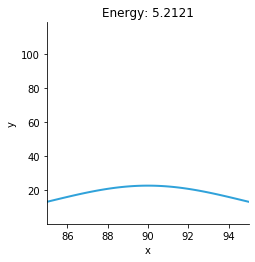
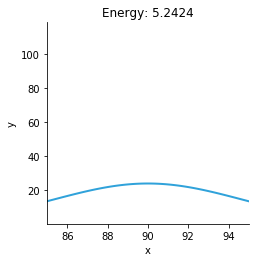
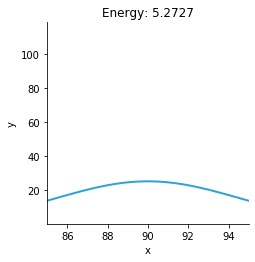
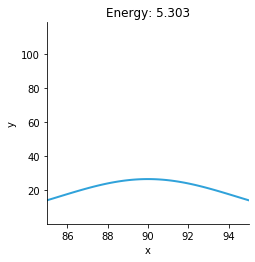
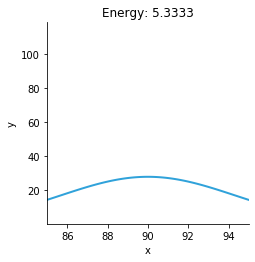
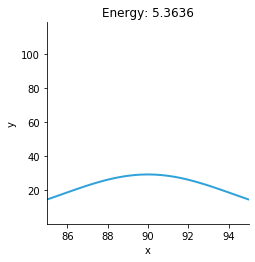
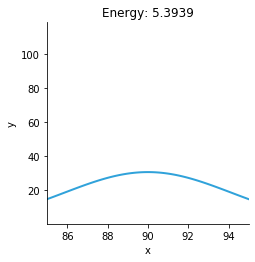
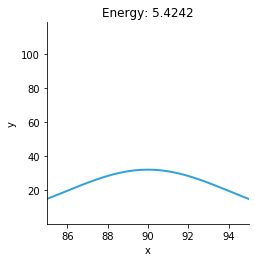
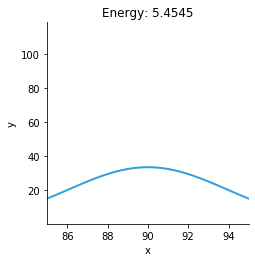
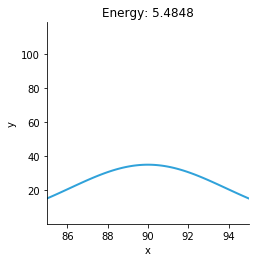
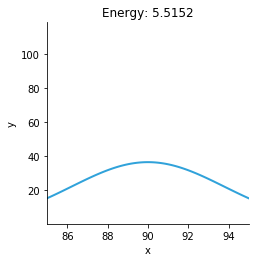
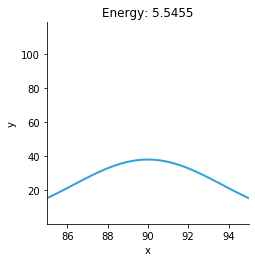
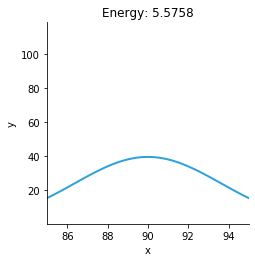
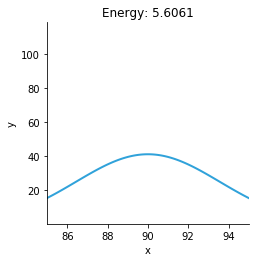
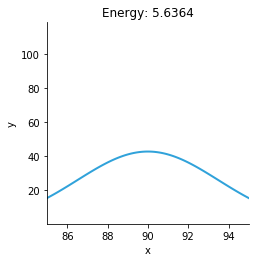
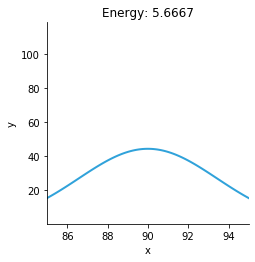
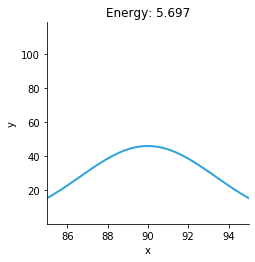
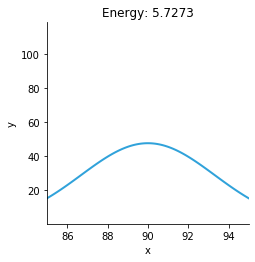
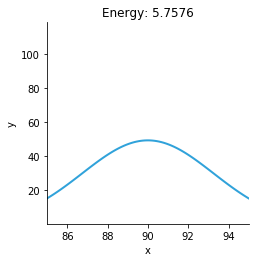
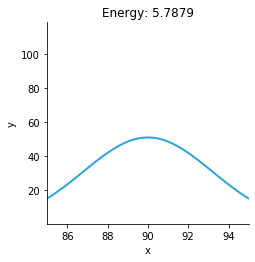
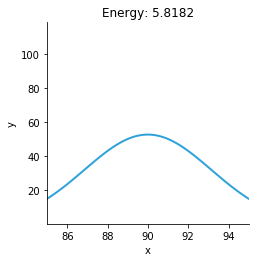
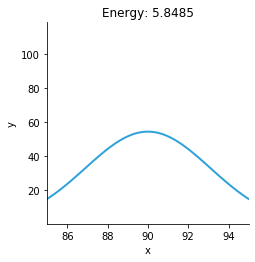
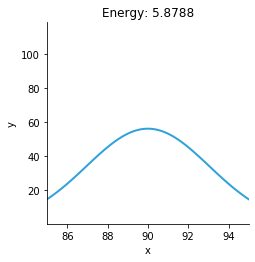
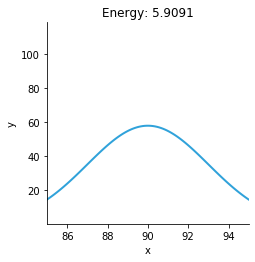
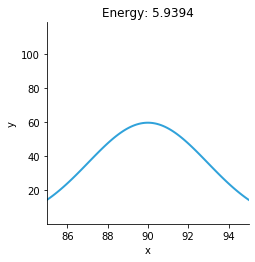
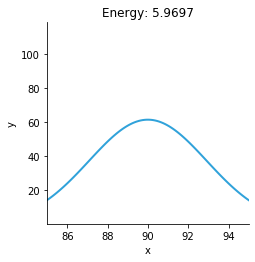
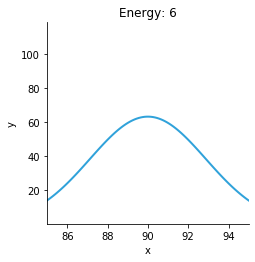
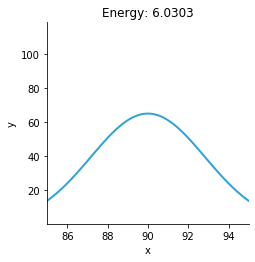
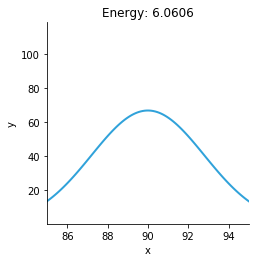
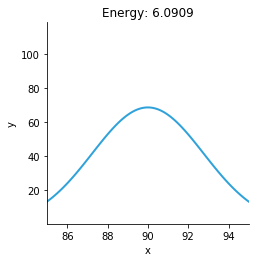
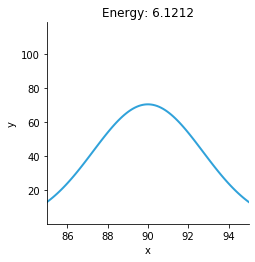
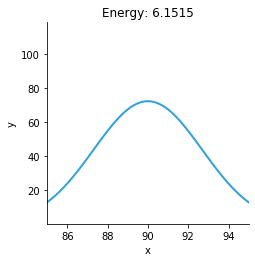
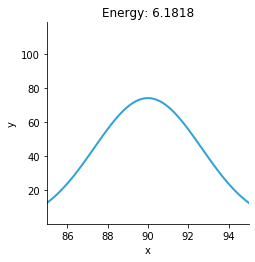
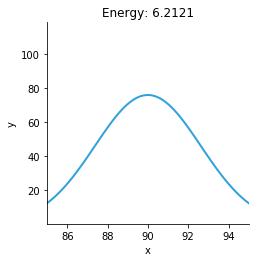
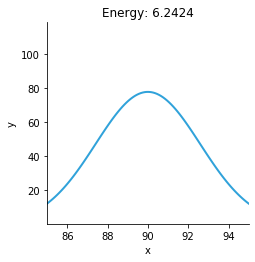
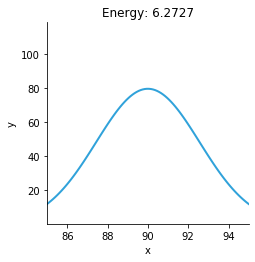
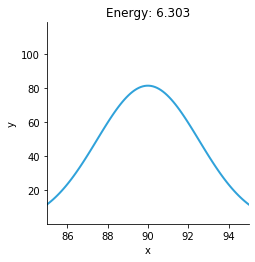
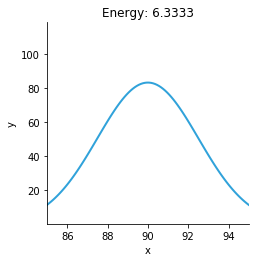
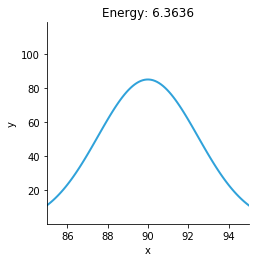
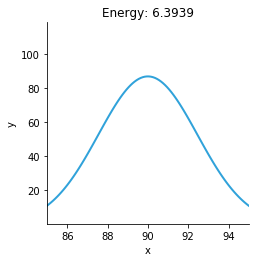
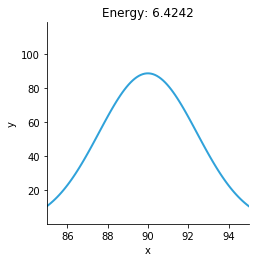
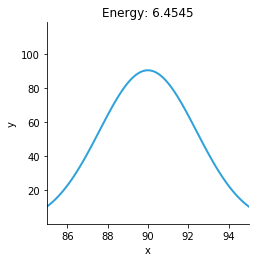
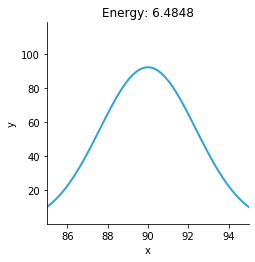
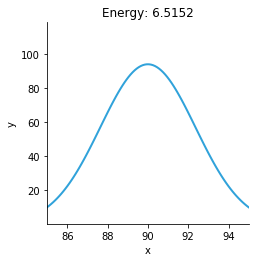
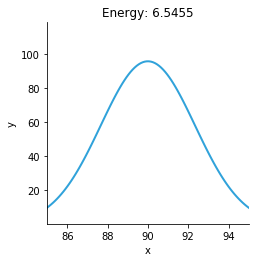
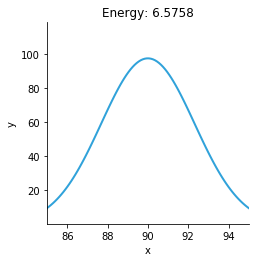
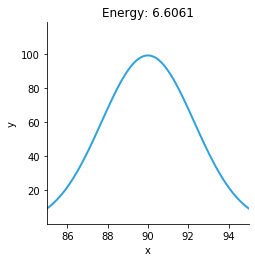
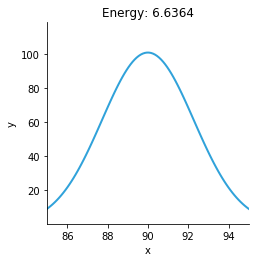
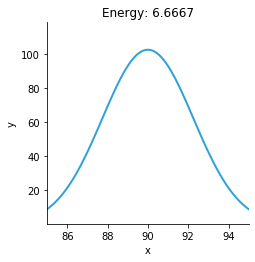
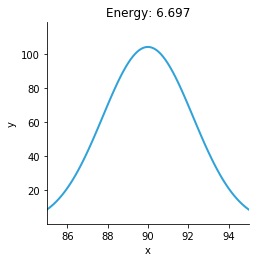
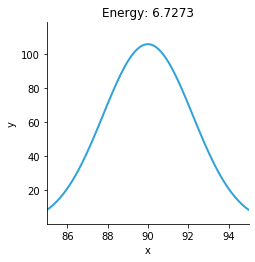
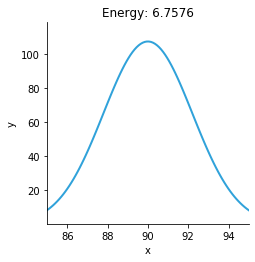
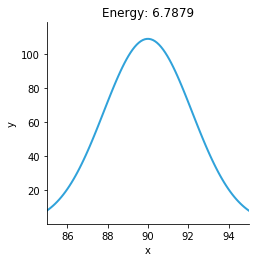
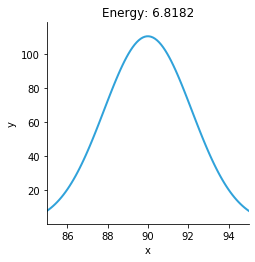
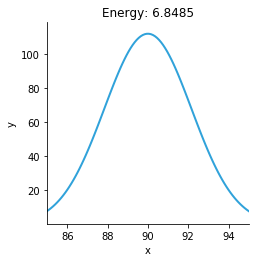
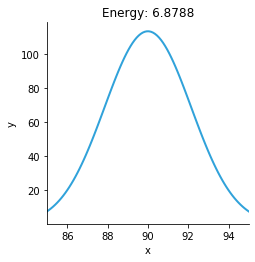
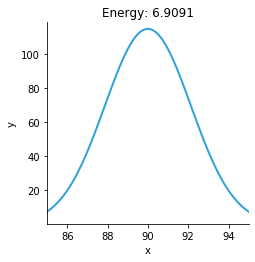
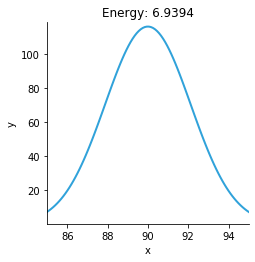
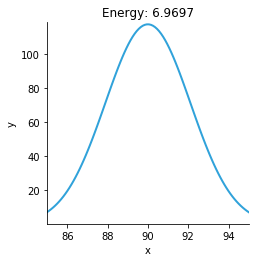
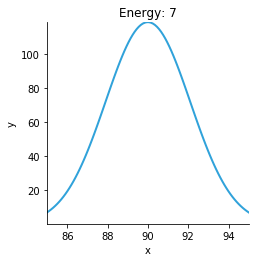

In [7]:
ang_res_e = np.exp(fit.extract()["ang_res"].squeeze())
obs = hv.HoloMap({np.log10(e_true[i]): hv.Curve((np.degrees(reco_zeniths), ang_res_e[i])) for i in range(100)}, kdims='Energy')
obs

:HoloMap   [Energy]
   :Curve   [x]   (y)
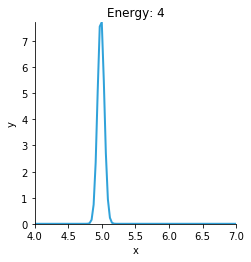
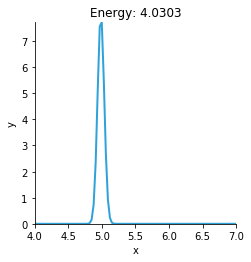
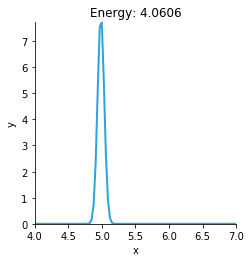
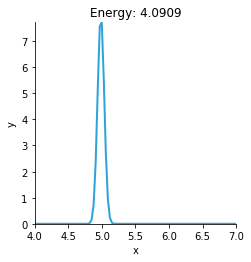
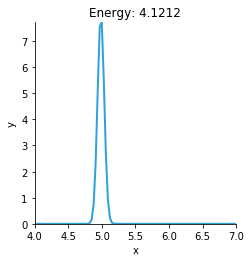
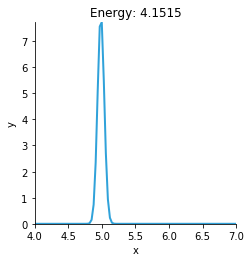
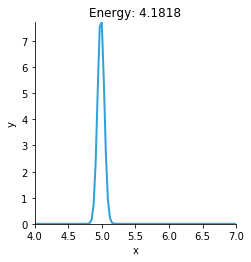
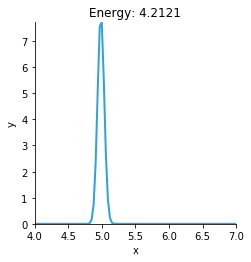
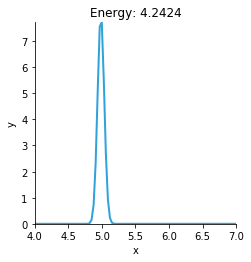
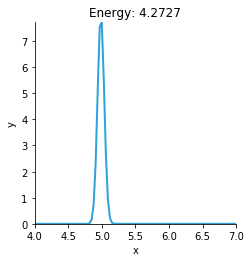
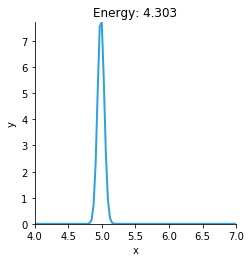
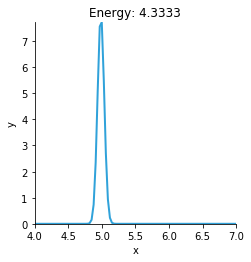
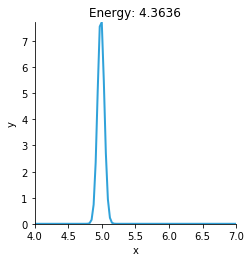
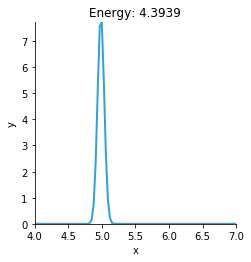
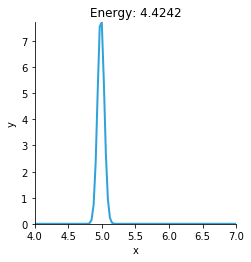
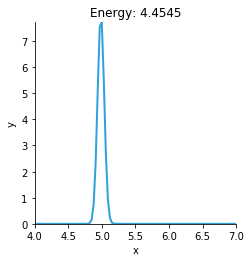
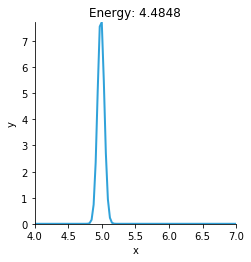
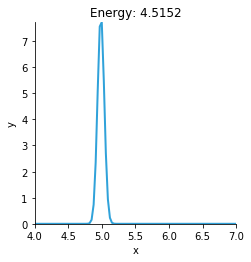
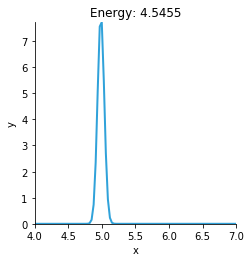
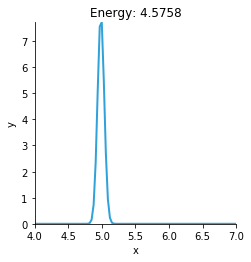
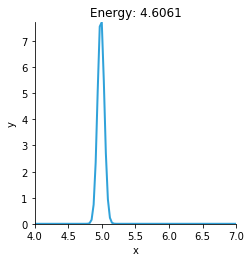
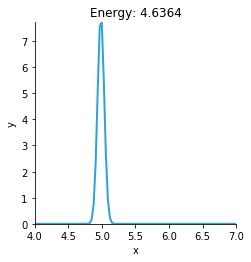
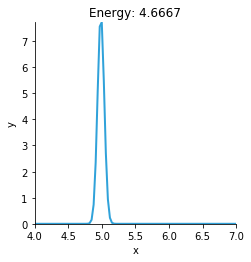
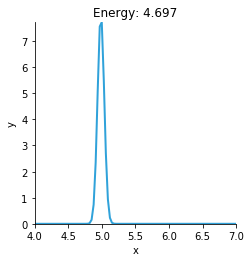
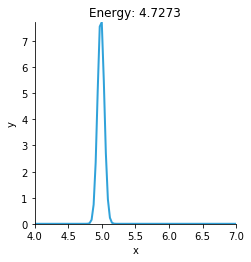
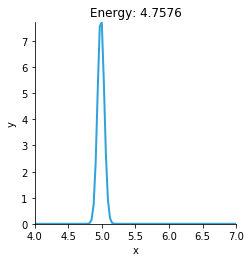
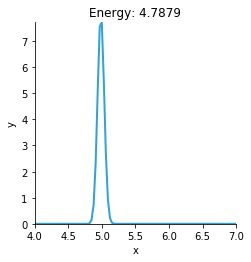
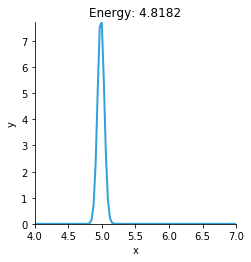
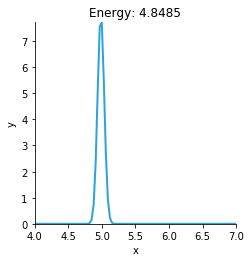
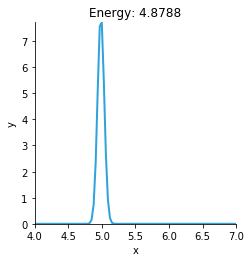
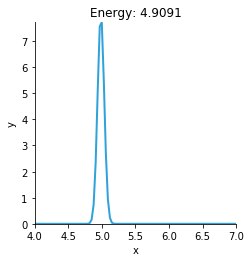
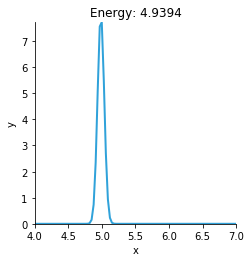
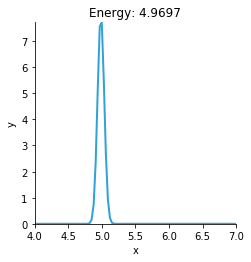
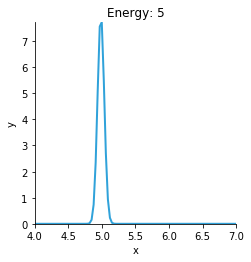
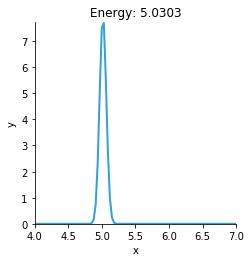
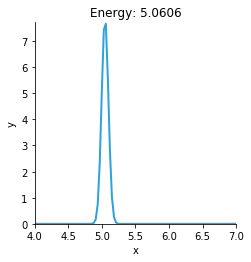
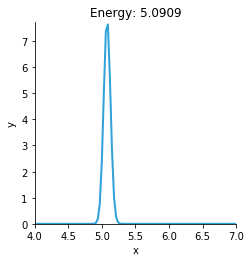
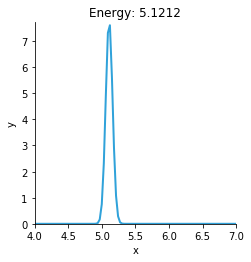
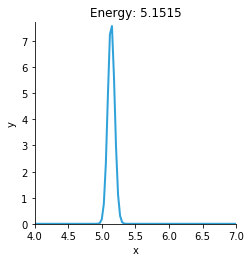
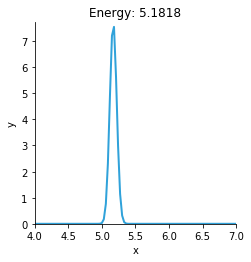
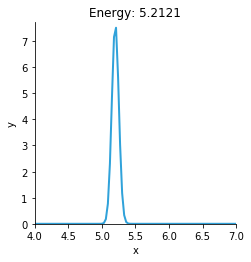
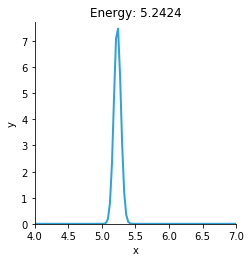
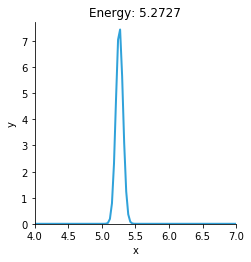
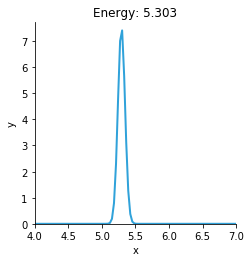
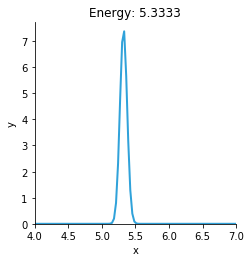
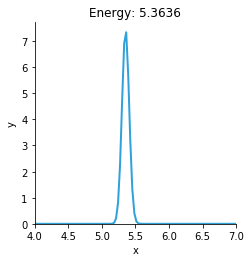
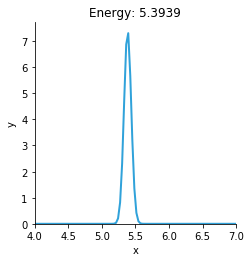
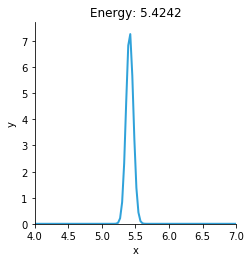
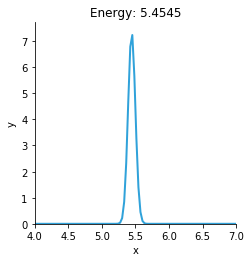
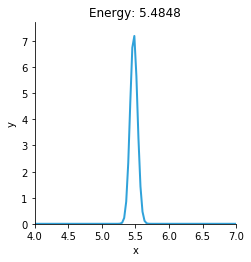
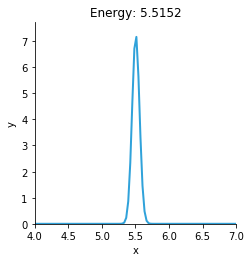
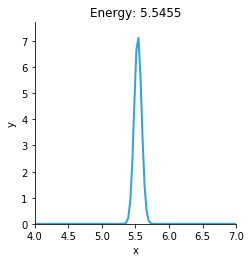
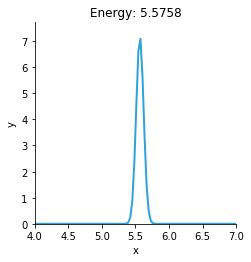
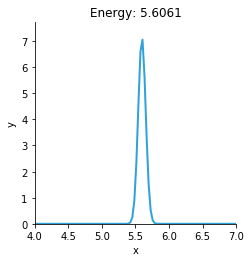
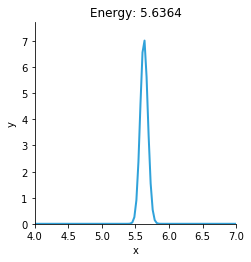
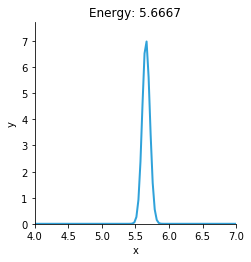
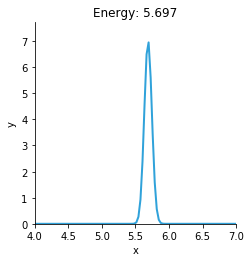
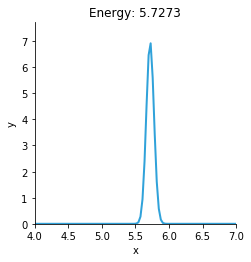
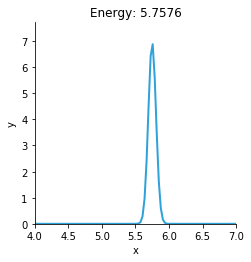
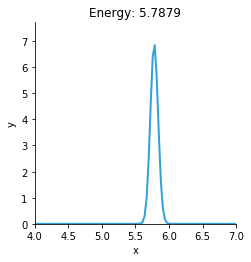
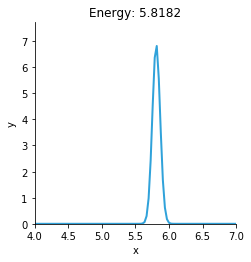
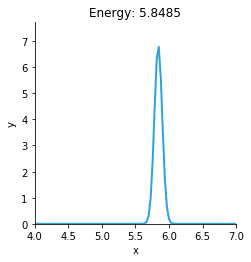
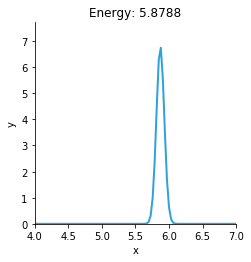
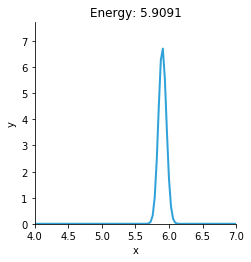
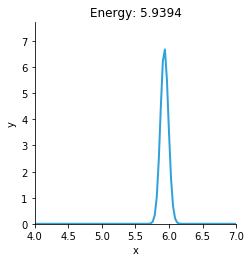
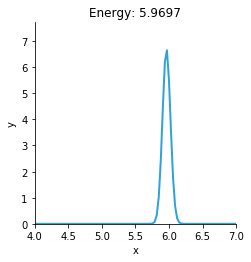
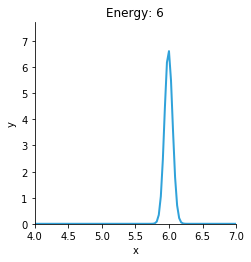
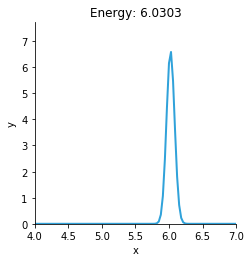
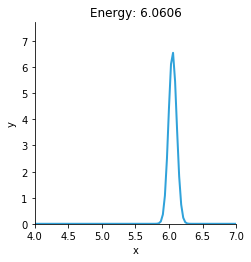
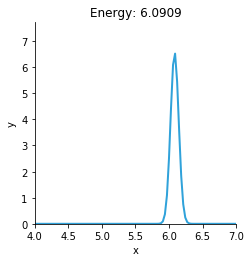
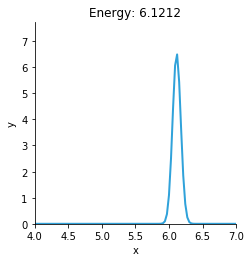
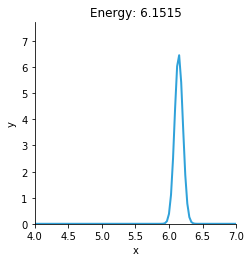
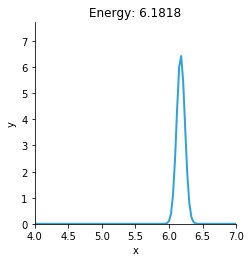
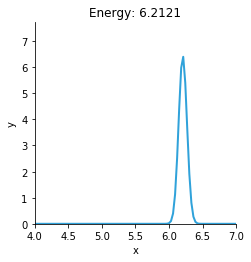
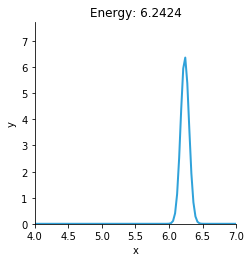
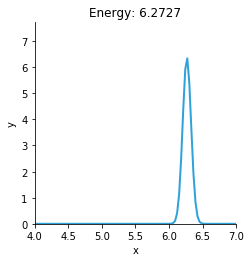
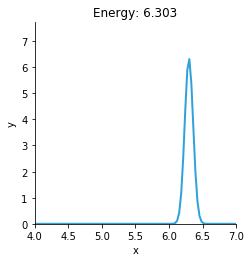
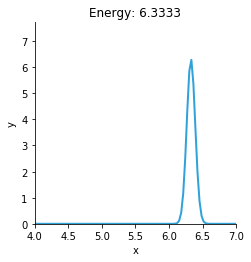
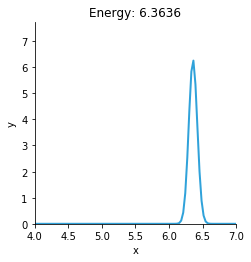
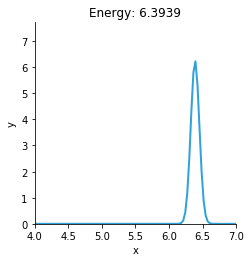
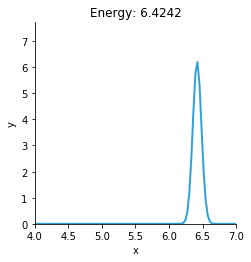
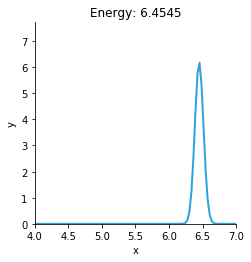
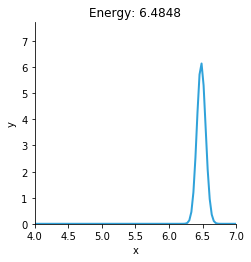
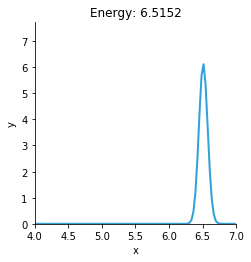
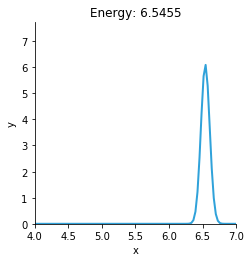
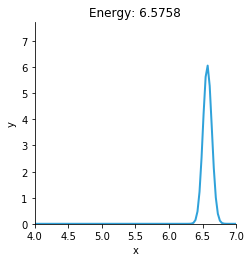
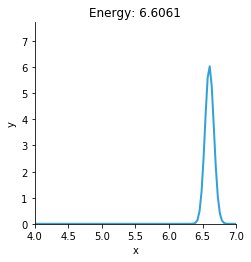
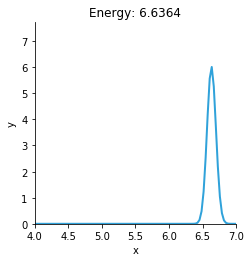
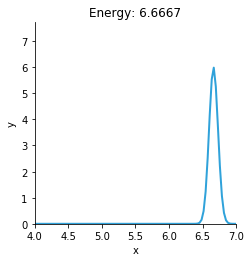
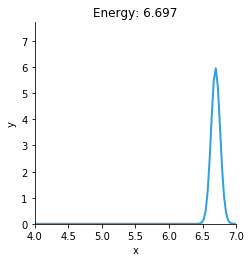
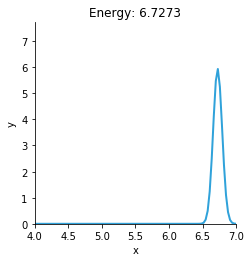
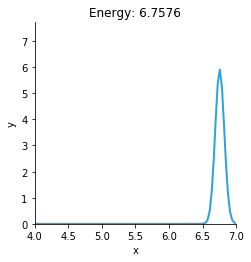
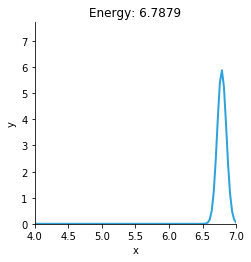
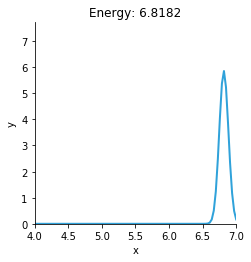
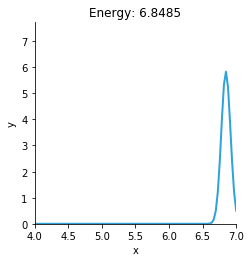
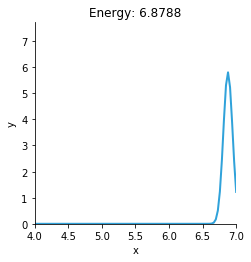
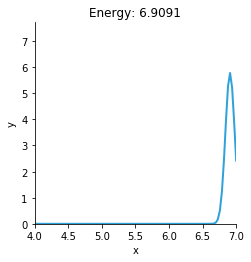
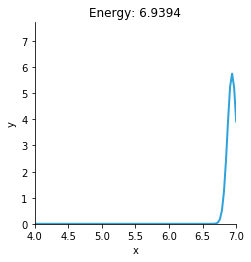
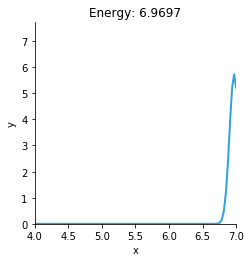
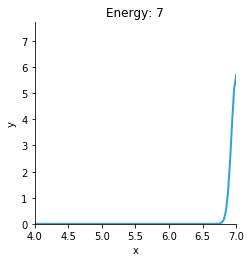

In [8]:
e_res_e = np.exp(fit.extract()["e_res"].squeeze())
obs = hv.HoloMap({np.log10(e_true[i]): hv.Curve((np.log10(e_reco), e_res_e[i])) for i in range(100)}, kdims='Energy')
obs

In [9]:
np.searchsorted(e_true, 1E5)

33

Test RV Generation
==================

In [10]:
with StanFileGenerator("stan_files/detector_model_test") as cg:   
#     ntd_rng = NorthernTracksDetectorModel(mode=DistributionMode.RNG)
    
#     ntd_pdf = NorthernTracksDetectorModel(mode=DistributionMode.PDF) 
    ntd_rng = CascadesDetectorModel(mode=DistributionMode.RNG)
    ntd_pdf = CascadesDetectorModel(mode=DistributionMode.PDF) 
    cg.generate_files()
    

In [11]:
with StanGenerator() as cg:
    with FunctionsContext() as fc:
        Include("utils.stan")
        Include("vMF.stan")
        #Include("detector_model_test_functions.stan")
        
    with DataContext() as dc:
        true_energy = ForwardVariableDef("true_energy", "real")
        true_dir = ForwardVariableDef("true_dir", "vector[3]")
        
    with GeneratedQuantitiesContext() as gq:
#         ntd_rng = NorthernTracksDetectorModel(mode=DistributionMode.RNG)
#         ntd_pdf = NorthernTracksDetectorModel(mode=DistributionMode.PDF) 
        
        ntd_rng = CascadesDetectorModel(mode=DistributionMode.RNG)
        ntd_pdf = CascadesDetectorModel(mode=DistributionMode.PDF) 
        rec_energy = ForwardVariableDef("rec_energy", "real")
        rec_dir = ForwardVariableDef("rec_dir", "vector[3]") 
        # rec_energy_lh = ForwardVariableDef("rec_energy_lh", "real")
        # rec_dir_lh = ForwardVariableDef("rec_dir_lh", "real")
        
        rec_energy << ntd_rng.energy_resolution(true_energy)
        rec_dir << ntd_rng.angular_resolution(true_energy, true_dir)
        # rec_energy_lh << ntd_pdf.energy_resolution(true_energy, 10**rec_energy)
        # rec_dir_lh << ntd_pdf.angular_resolution(true_energy, true_dir, rec_dir)
        
    model = cg.generate()
    
    
with StanGenerator() as cg:
    with FunctionsContext() as fc:
        Include("utils.stan")
        Include("vMF.stan")
      
        
    with DataContext() as dc:
        true_energy = ForwardVariableDef("true_energy", "real")              
        e_recos = ForwardArrayDef("e_recos", "real", ["[100]"])
      
    with GeneratedQuantitiesContext() as gq:
        e_res_result = ForwardArrayDef("e_res", "real", ["[100]"])
#         ntd_pdf = NorthernTracksDetectorModel(mode=DistributionMode.PDF) 
        ntd_pdf = CascadesDetectorModel(mode=DistributionMode.PDF) 
        with ForLoopContext(1, 100, "i") as i:
            e_res_result[i] << ntd_pdf.energy_resolution(true_energy, e_recos[i])
        
    model2 = cg.generate()

In [12]:
this_dir = os.path.abspath('')
sm = pystan.StanModel(
    model_code=model,
    include_paths=[
        os.path.join(this_dir, "stan_files"),
        os.path.join(this_dir, "../dev/statistical_model/4_tracks_and_cascades/stan/")],
    verbose=False)

this_dir = os.path.abspath('')
sm2 = pystan.StanModel(
    model_code=model2,
    include_paths=[
        os.path.join(this_dir, "stan_files"),
        os.path.join(this_dir, "../dev/statistical_model/4_tracks_and_cascades/stan/")],
    verbose=False)

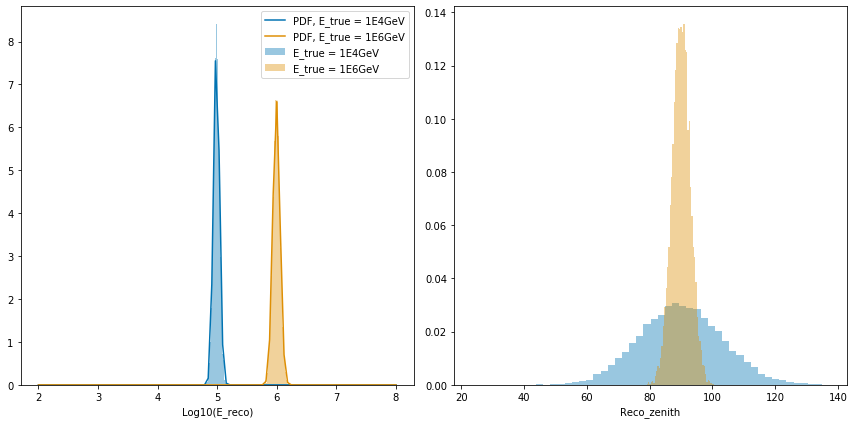

In [13]:
zenith = np.pi/2

fix, axs = plt.subplots(1, 2, figsize=(12, 6))

data = {"true_energy": 1E4,
        "true_dir":[np.sin(zenith), 0, np.cos(zenith)],
        "e_recos" : np.logspace(2, 8, 100)}

colors = sns.color_palette("colorblind")

fit = sm.sampling(data=data, iter=10000, chains=1, algorithm="Fixed_param")
fit2 = sm2.sampling(data=data, iter=1, chains=1, algorithm="Fixed_param")
sns.distplot(fit["rec_energy"], ax=axs[0], label="E_true = 1E4GeV", kde=False, norm_hist=True, color=colors[0])
sns.distplot(np.degrees(np.arccos(fit["rec_dir"][:, 2])), ax=axs[1], kde=False, norm_hist=True, color=colors[0])
axs[0].plot(np.log10(data["e_recos"]), np.exp(fit2.extract()["e_res"].squeeze()), color=colors[0], label="PDF, E_true = 1E4GeV")

data = {"true_energy": 1E6,
        "true_dir":np.asarray([np.sin(zenith), 0, np.cos(zenith)]).T,
        "e_recos" : np.logspace(2, 8, 100)}

fit = sm.sampling(data=data, iter=10000, chains=1, algorithm="Fixed_param")
fit2 = sm2.sampling(data=data, iter=1, chains=1, algorithm="Fixed_param")
sns.distplot(fit["rec_energy"], ax=axs[0], label="E_true = 1E6GeV", kde=False, norm_hist=True, color=colors[1])
sns.distplot(np.degrees(np.arccos(fit["rec_dir"][:, 2])), ax=axs[1], kde=False, norm_hist=True, color=colors[1])
axs[0].plot(np.log10(data["e_recos"]), np.exp(fit2.extract()["e_res"].squeeze()), color=colors[1], label="PDF, E_true = 1E6GeV")



axs[0].set_xlabel("Log10(E_reco)")
axs[1].set_xlabel("Reco_zenith")
axs[0].legend(loc="upper right")
plt.tight_layout()
plt.savefig("rng_crosscheck.png", dpi=200)
